In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("./final_aggregated_data.csv")
df.head()

,ACCIDENT_NO,TIME_OF_DAY_CODE,SEVERITY,ACCIDENT_TYPE_1,ACCIDENT_TYPE_2,ACCIDENT_TYPE_3,ACCIDENT_TYPE_4,ACCIDENT_TYPE_5,ACCIDENT_TYPE_6,ACCIDENT_TYPE_7,...,SEX_U,SEX_nan,ROAD_USER_TYPE_DESC_Drivers,ROAD_USER_TYPE_DESC_E-scooter Rider,ROAD_USER_TYPE_DESC_Motorcyclists,ROAD_USER_TYPE_DESC_Not Known,ROAD_USER_TYPE_DESC_Passengers,ROAD_USER_TYPE_DESC_Pedestrians,ROAD_USER_TYPE_DESC_Pillion Passengers,HELMET_BELT_WORN_risk
0,T20120000009,4,3,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,T20120000012,4,2,1,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,T20120000013,4,2,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,T20120000021,1,3,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,T20120000028,4,2,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
df['VEHICLE_YEAR_BIN'] = pd.cut(
    df['VEHICLE_YEAR_MANUF_h'], 
    bins=[1950,1970,1980,2000, 2010,2020,2030], 
    labels=False, 
    include_lowest=True
)

df['VEHICLE_WEIGHT_BIN'] = pd.qcut(
    df['VEHICLE_WEIGHT_h'], 
    q=5, 
    labels=False, 
    duplicates='drop' 
)

In [4]:
Counter(df['SEVERITY'])

Counter({3: 97006, 2: 54461, 1: 2524, 4: 3})

In [5]:
df = df[df['SEVERITY'] != 4]
df['SEVERITY'] = df['SEVERITY'] - 1
Counter(df['SEVERITY'])

Counter({2: 97006, 1: 54461, 0: 2524})

In [6]:
top_30_features = ['SEVERITY', 'DCA_Same Direction', 'ACCIDENT_TYPE_1', 'INITIAL_IMPACT_h_3', 'SPEED_ZONE_High Speed Zone', 'ACCIDENT_TYPE_4', 'DCA_Off Road Straight', 'AGE_GROUP', 'SPEED_ZONE_Unknown Zone', 'ROAD_USER_TYPE_DESC_Motorcyclists', 'ROAD_USER_TYPE_DESC_Pedestrians', 'LIGHT_CONDITION_9', 'ACCIDENT_TYPE_2', 'DCA_Pedestrian', 'LIGHT_CONDITION_5', 'INTENT_MATCH_h', 'HELMET_BELT_WORN_risk', 'TIME_OF_DAY_CODE', 'ROAD_GEOMETRY_5', 'FUEL_TYPE_P', 'VEHICLE_WEIGHT_BIN', 'DCA_Off Road Curve', 'DCA_Head-on', 'ROAD_GEOMETRY_1', 'SPEED_ZONE_Low Speed Zone', 'ROAD_USER_TYPE_DESC_Passengers', 'VEHICLE_YEAR_BIN', 'SEX_M', 'SEX_U', 'LIGHT_CONDITION_3', 'SPEED_ZONE_Medium Speed Zone']
filtered_df_5 = df[top_30_features[0:6]]
filtered_df_10 = df[top_30_features[0:11]]
filtered_df_20 = df[top_30_features[0:21]]

In [7]:
X_5 = filtered_df_5.drop(columns=['SEVERITY'])
y_5 = filtered_df_5['SEVERITY']

X_10 = filtered_df_10.drop(columns=['SEVERITY'])
y_10 = filtered_df_10['SEVERITY']

X_20 = filtered_df_20.drop(columns=['SEVERITY'])
y_20 = filtered_df_20['SEVERITY']

In [8]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)

In [9]:
scaler_5 = StandardScaler()
X_train_scaled_5 = scaler_5.fit_transform(X_train_5)
X_test_scaled_5 = scaler_5.transform(X_test_5)

scaler_10 = StandardScaler()
X_train_scaled_10 = scaler_10.fit_transform(X_train_10)
X_test_scaled_10 = scaler_10.transform(X_test_10)

scaler_20 = StandardScaler()
X_train_scaled_20 = scaler_20.fit_transform(X_train_20)
X_test_scaled_20 = scaler_20.transform(X_test_20)

datasets = [
    (X_train_scaled_5, X_test_scaled_5, y_train_5, y_test_5),
    (X_train_scaled_10, X_test_scaled_10, y_train_10, y_test_10),
    (X_train_scaled_20, X_test_scaled_20, y_train_20, y_test_20),
]
feature_num = [5, 10, 20]

In [10]:
results = []
for idx, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    macro_recall = report['macro avg']['recall']
    class_0_recall = report['0']['recall']
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Features': feature_num[idx],
        'Macro Recall': macro_recall,
        'Class 0 Recall': class_0_recall,
        'Accuracy': accuracy
    })

results_df_knn = pd.DataFrame(results)

D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
results = []
for idx, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    macro_recall = report['macro avg']['recall']
    class_0_recall = report['0']['recall']
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Features': feature_num[idx],
        'Macro Recall': macro_recall,
        'Class 0 Recall': class_0_recall,
        'Accuracy': accuracy
    })
results_df_rf = pd.DataFrame(results)

D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
results = []
for idx, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    xgb_model = XGBClassifier(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    macro_recall = report['macro avg']['recall']
    class_0_recall = report['0']['recall']
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Features': feature_num[idx],
        'Macro Recall': macro_recall,
        'Class 0 Recall': class_0_recall,
        'Accuracy': accuracy
    })
results_df_xgb = pd.DataFrame(results)

D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\python\python3.10.13\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


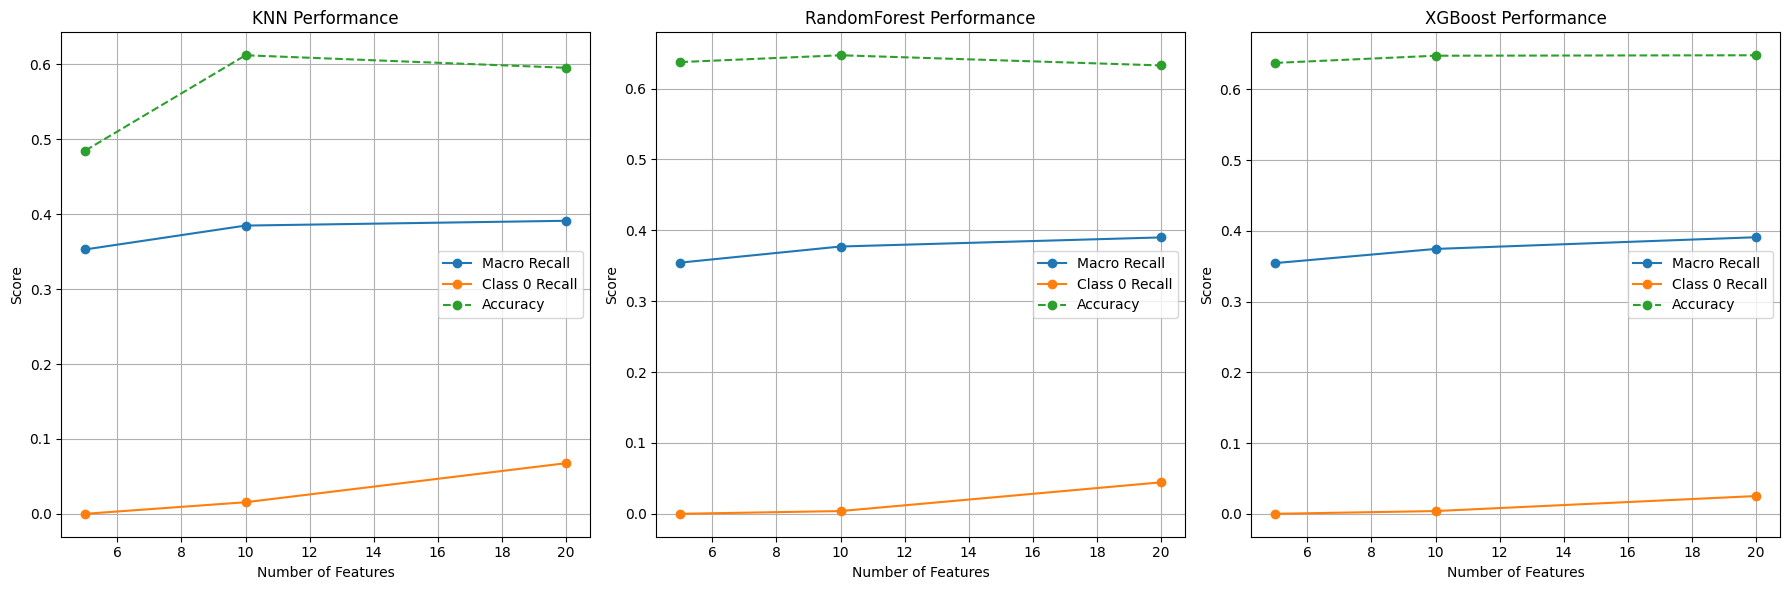

In [13]:
results = [
    (results_df_knn, 'KNN'),
    (results_df_rf, 'RandomForest'),
    (results_df_xgb, 'XGBoost')
]

plt.figure(figsize=(18, 6))

for i, (df, model_name) in enumerate(results, start=1):
    plt.subplot(1, 3, i)
    
    plt.plot(df['Features'], df['Macro Recall'], marker='o', label='Macro Recall')
    plt.plot(df['Features'], df['Class 0 Recall'], marker='o', label='Class 0 Recall')
    plt.plot(df['Features'], df['Accuracy'], marker='o', linestyle='--', label='Accuracy')
    
    plt.xlabel('Number of Features')
    plt.ylabel('Score')
    plt.title(f'{model_name} Performance')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Using 20 features
X_train_scaled, X_test_scaled, y_train, y_test = datasets[2]

In [15]:
# K-nearest neighbors
param_grid = {'n_neighbors': list([2,4,6,8,10])}
recall_macro = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring=recall_macro,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best Macro Recall: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best k: 2
Best Macro Recall: 0.3886


In [16]:
best_k = grid_search.best_params_['n_neighbors']

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_pred = knn_best.predict(X_test_scaled)

print("K-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

K-Nearest Neighbors Confusion Matrix:
[[   75   349    94]
 [  468  6451  3899]
 [  423 10117  8923]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0     0.0776    0.1448    0.1011       518
           1     0.3813    0.5963    0.4652     10818
           2     0.6908    0.4585    0.5512     19463

    accuracy                         0.5016     30799
   macro avg     0.3833    0.3999    0.3725     30799
weighted avg     0.5718    0.5016    0.5134     30799



In [17]:
# Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [10, 20, 30],             
    'min_samples_split': [2, 5],           
    'class_weight': ['balanced']          
}

recall_macro = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=recall_macro,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Macro Recall: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Macro Recall: 0.5290


In [18]:
best_params = grid_search.best_params_


rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    class_weight='balanced',
    random_state=42
)

rf_best.fit(X_train_scaled, y_train)

y_pred = rf_best.predict(X_test_scaled)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Random Forest Confusion Matrix:
[[  322   130    66]
 [ 2670  3643  4505]
 [ 2506  4434 12523]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.0586    0.6216    0.1070       518
           1     0.4439    0.3368    0.3830     10818
           2     0.7326    0.6434    0.6851     19463

    accuracy                         0.5353     30799
   macro avg     0.4117    0.5339    0.3917     30799
weighted avg     0.6199    0.5353    0.5693     30799



In [19]:
# XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'scale_pos_weight': [1, 5, 10] 
}

recall_macro = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=param_grid,
    scoring=recall_macro,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Macro Recall: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


D:\Study\python\python3.10.13\lib\site-packages\xgboost\core.py:160: UserWarning: [04:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1}
Best Macro Recall: 0.3862


In [20]:
best_params = grid_search.best_params_

xgb_best = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    scale_pos_weight=best_params['scale_pos_weight'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_best.fit(X_train_scaled, y_train)

y_pred = xgb_best.predict(X_test_scaled)

print("XGBClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nXGBClassifier Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

D:\Study\python\python3.10.13\lib\site-packages\xgboost\core.py:160: UserWarning: [04:23:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Confusion Matrix:
[[   11   313   194]
 [    6  2907  7905]
 [    5  2405 17053]]

XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0     0.5000    0.0212    0.0407       518
           1     0.5168    0.2687    0.3536     10818
           2     0.6780    0.8762    0.7645     19463

    accuracy                         0.6484     30799
   macro avg     0.5649    0.3887    0.3863     30799
weighted avg     0.6184    0.6484    0.6080     30799

